# Lab 7: Comparing Proportions

The HIV virus is transmitted through four bodily fluids: blood, semen, vaginal/anal fluid, and breast milk. Any time that infected fluids of these types come into contact with an unifected person's blood stream or mucosa, HIV infection may occur. In the United States, the most common activities where these infections happen are sexual activity, particularly anal intercourse, and intravenous drug use. 

There are many effective ways to prevent HIV. To counteract risk from sexual intercourse, condoms can be used to prevent HIV transmission. However, condoms are only reliable if used correctly every time. Even then, condoms can tear or slip, reducing their effectiveness at preventing HIV (as well as other STIs and pregnancy). Because of this and other things like personal preference, many people find using condoms difficult. In addition, some may not be in a position to insist that their partner use a condom.

A different approach to HIV prevention is through medication. Since the 1990s and 2000s, effective and easy-to-use drugs have been developed to combat HIV. In the 2010's a new form of HIV prevention was developed that works by giving uninfected individuals low doses of the same drugs used to treat HIV in order to prevent infection. The basic principle is that these drugs prevent any HIV viruses that have entered the body from reproducing, thus not allowing an infection to establish. This approach is called pre-exposure prophylaxis, or PrEP. (PrEP is currently a widely available and commonly used medication that your primary care doctor can prescribe.)

Here is some real data from a clinical trial of a PrEP drug (<a href="http://dx.doi.org/10.1056/NEJMoa1011205">Grant et al. 2010. New England Journal of Medicine</a>). Note that, as in many clinical trials, some participants took the drug less often than prescribed.

<table>
    <tr>
        <th> </th>
        <th>Drug</th>
        <th>Placebo</th>
    </tr>
    <tr>
        <th>Infected</th>
        <td>36</td>
        <td>64</td>
    </tr>
    <tr>
        <th>Not Infected</th>
        <td>1215</td>
        <td>1184</td>
    </tr>
</table>

We need to run a statistical analysis to make sure the drug works.



1. As usual, import Numpy, Seaborn and Pyplot.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Enter the data above into a Numpy array using the function `np.array`. To do this, give the input as a list of lists, with each list representing a row of the data table.

In [2]:
infected=[36, 64]
notinfected=[1215, 1184]
data=[infected, notinfected]
obs=np.array(data)

We want to compare the observed data to what we would expect if the drug did not prevent HIV infection. In that case, the probability of infection for both groups would be the one observed in the whole sample. The total numbers of people receiving the drug vs. placebo would be the same as in the real study, but the numbers of infected and uninfected individuals would be different.

3. By hand (you can use the computer as a calculator), compute the values you would expect to observe if the drug did not work and enter this array into Jupyter. Decimals are OK.

In [3]:
#expected value is sum of column * sum of row / n
totaldrug = 36+1215
totalplacebo = 64+1184
totalinfected = 36+64
totaluninfected= 1215+1184
n=np.sum(obs)

exindrug=(totalinfected)/n*totaldrug
exinplacebo=totalinfected/n*totalplacebo
exunindrug=(totaluninfected)/n*totaldrug
exuninplacebo=totaluninfected/n*totalplacebo
expected=[[exindrug, exinplacebo],[exunindrug,exuninplacebo]]
expected,n

([[50.06002400960384, 49.939975990396164],
  [1200.9399759903963, 1198.060024009604]],
 2499)

We can use the $|\chi|$ statistic, defined as $|\chi|=\sum\frac{|\text{observed-expected}|}{\text{expected}}$, to compare the observed values to the expected ones.

4. Compute $|\chi|$ for your data. NOTE: Since we are using pure Python, not SageMath, you'll need to use ** for powers.

In [4]:
chiabs=np.sum(np.abs(obs-expected)/expected)
chiabs

0.5858449460010661

5. Write a function to compute $|\chi|$ for any arrays of observed and expected data.

In [9]:
def chiabs(obs, exp):
    result=np.sum(np.abs(obs-expected)/expected)
    return result

In [10]:
obschi=chiabs(obs,expected)
obschi

0.5858449460010661

## Resampling

By itself, the $\chi^{2}$ statistic doesn't give us much information. Its purpose in life is to be compared to what we would get if the null hypothesis was true. To simulate the null hypothesis, we randomly assign outcomes to “drug” and “placebo” groups.

6. Make a list of infected and not-infected individuals, putting in as many of each as there are in the whole sample. HINT: Remember the `[entry]*n` syntax for making a list of _n_ copies of `entry`.

In [15]:
p_data=["I"]*totalinfected + ["NI"]*totaluninfected

7. Use the function `np.zeros([rows,cols])` to make an array of zeros to store your simulated data.

In [16]:
sim=np.zeros([2,2])

8. From your list of infected and not-infected individuals, take a sample of as many outcomes as there were people in the drug group. For the first time, we'll use sampling without replacement, which you can do by adding to `np.random.choice` the option `replace = False`, which by default is true. Then, count how many infected and not-infected individuals there are and place the counts in the appropriate cells in your storage array. HINT: To access an element in an array, use the notation `arr[row, column]`, where counting starts at 0.

In [17]:
drug_resample=np.random.choice(p_data, totaldrug, replace = False)
sim[0,0]=np.sum(drug_resample == "I")
sim[1,0]=np.sum(drug_resample == "NI")
print(sim)

[[  61.    0.]
 [1190.    0.]]


9. Do the same thing for the placebo group.

In [18]:
placebo_resample = np.random.choice(p_data, totalplacebo, replace = False)
sim[0,1]=np.sum(placebo_resample == "I")
sim[1,1]=np.sum(placebo_resample == "NI")
print(sim)

[[  61.   49.]
 [1190. 1199.]]


10. Compute $\chi^{2}$ to compare your simulated array to your expected array.

In [19]:
chiabs(sim, expected)

0.2472533784224105

In [24]:
drug_resample=np.random.choice(p_data, totaldrug, replace = False)
sim[0,0]=np.sum(drug_resample == "I")
sim[1,0]=np.sum(drug_resample == "NI")
placebo_resample = np.random.choice(p_data, totalplacebo, replace = False)
sim[0,1]=np.sum(placebo_resample == "I")
sim[1,1]=np.sum(placebo_resample == "NI")
chiabs(sim, expected)

0.12740326822615386

11. Set up an array in which to store your simulated $\chi^{2}$ values and perform the simulation 10,000 times.

In [25]:
results=np.zeros(10000)
sim=np.zeros([2,2])
p_data=["I"]*totalinfected + ["NI"]*totaluninfected
for i in range(10000):
    drug_resample=np.random.choice(p_data, totaldrug)
    sim[0,0]=np.sum(drug_resample == "I")
    sim[1,0]=np.sum(drug_resample == "NI")
    placebo_resample = np.random.choice(p_data, totalplacebo)
    sim[0,1]=np.sum(placebo_resample == "I")
    sim[1,1]=np.sum(placebo_resample == "NI")
    results[i]=chiabs(sim, expected)

12. Make a histogram of your simulated results. Mark the observed result with a vertical line.

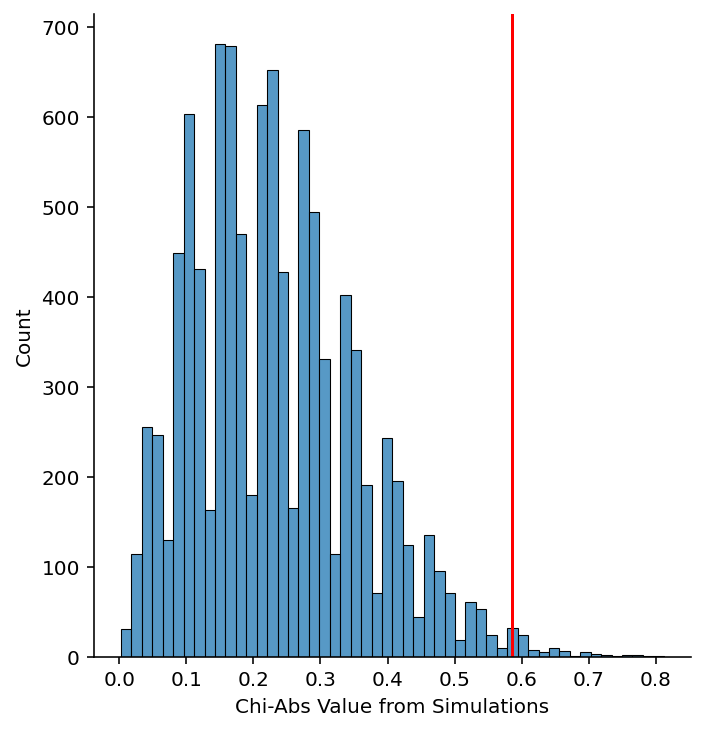

In [27]:
p=sns.displot(data=results)
p.set(xlabel = "Chi-Abs Value from Simulations")
plt.axvline(obschi, color = "red")

13. Compute a p-value for your data. What do you conclude about the drug?

In [28]:
count=np.sum(results >= obschi)
pval=count/10000
pval

#With a p-value of 0.0171, we can reject the null hypothesis and say that the drug has a significant effect on the odds of being infected with HIV. 

0.0076

## A Different Comparison - this section is not in Lab 7 for 21F

As you saw previously in the course, we can replace squaring with absolute values.

14. Write a function to compute $|\chi|=\sum\frac{|\text{observed-expected}|}{\text{expected}}$ ("chi-abs"). HINT: Use the function `np.abs` to compute the absolute value of each entry in an array.

In [18]:
def chiabs(obs, exp):
    result=np.sum((np.abs(obs-exp))/exp)
    return result

15. Repeat the analysis using $|\chi|$ as your test statistic. Do your conclusions change?

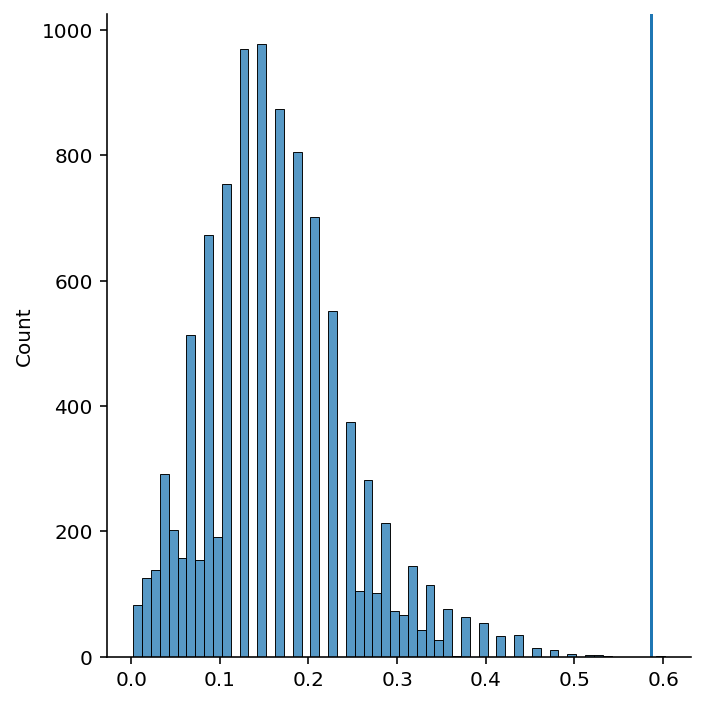

In [21]:
obschiabs=chiabs(obs, expected)
results=np.zeros(10000)
sim=np.zeros([2,2])
p_data=["I"]*totalinfected + ["NI"]*totaluninfected
for i in range(10000):
    drug_resample=np.random.choice(p_data, totaldrug, replace=False)
    sim[0,0]=np.sum(drug_resample == "I")
    sim[1,0]=np.sum(drug_resample == "NI")
    placebo_resample = np.random.choice(p_data, totalplacebo, replace=False)
    sim[0,1]=np.sum(placebo_resample == "I")
    sim[1,1]=np.sum(placebo_resample == "NI")
    results[i]=chiabs(sim, expected)

p=sns.displot(data=results)
plt.axvline(obschiabs)

In [22]:
count=np.sum(results >= obschiabs)
pval=count/10000
pval

0.0001

## A More Meaningful Analysis

The $\chi^2$ and $|\chi|$ tests you just performed told you whether the study found a statistically significant effect. However, they said nothing about the magnitude of the effect or the uncertainty associated with it. In the exercises that follow, you will quantify the study's effect and put a confidence interval on this number.

One commonly used effect size measure for binary outcomes (like "infected" vs. "not infected" or "lived" vs. "died") is the _relative risk_, also called the risk ratio. This is just the ratio of the probabilities of an outcome for the two groups. In this case, it is the probability of infection for the drug group divided by the probability of infection for the placebo group.

16. Compute the relative risk of infection for this study. Write a sentence interpreting it.

In [18]:
obs
#To see the observed array again

array([[  36,   64],
       [1215, 1184]])

In [33]:
probinfecdrug=obs[0,0]/totaldrug
probinfecplacebo=obs[0,1]/totalplacebo
rrobs=probinfecdrug/probinfecplacebo
rrobs

#This observed relative risk means that with our data, the probability of getting HIV with the drug is 0.5 times less than the probability of getting HIV with a placebo. 

0.5611510791366907

Now we want to put a confidence interval on the relative risk. To do this, we will need to resample the drug and placebo groups separately, counting how many infected and uninfected individuals are in each group. We can then compute the relative risk for this resampled data and construct a confidence interval as usual.

17. Compute the relative risk for the original data again, using indexing.

In [20]:
#Did that in 16

18. Make lists of outcomes for the drug and placebo groups.

In [30]:
p_drug=["I"]*obs[0,0] + ["NI"]*obs[1,0]
p_placebo=["I"]*obs[0,1] + ["NI"]*obs[1,1]

19. Resampling from the lists, fill in an array with simulated data. HINT: You did something very similar in #8.

In [22]:
rrsim = np.zeros([2, 2])
drug_resample = np.random.choice(p_drug, totaldrug)
rrsim[0, 0] = np.sum(drug_resample == "I")
rrsim[1, 0] = np.sum(drug_resample == "NI")

placebo_resample = np.random.choice(p_placebo, totalplacebo)
rrsim[0, 1] = np.sum(placebo_resample == "I")
rrsim[1, 1] = np.sum(placebo_resample == "NI")

print(rrsim)

[[  32.   55.]
 [1219. 1193.]]


20. Compute the relative risk for your simulated data.

In [23]:
probinfecdrug=rrsim[0,0]/totaldrug
probinfecplacebo=rrsim[0,1]/totalplacebo
rr=probinfecdrug/probinfecplacebo
rr

0.5804229343797689

21. Repeat this procedure 10,000 times.

In [31]:
rrsim=np.zeros([2,2])
simresults=np.zeros(10000)
for i in range(10000):
    drug_resample=np.random.choice(p_drug, totaldrug)
    rrsim[0,0]=np.sum(drug_resample == "I")
    rrsim[1,0]=np.sum(drug_resample == "NI")

    placebo_resample = np.random.choice(p_placebo, totalplacebo)
    rrsim[0,1]=np.sum(placebo_resample == "I")
    rrsim[1,1]=np.sum(placebo_resample == "NI")

    probinfecdrug=rrsim[0,0]/totaldrug
    probinfecplacebo=rrsim[0,1]/totalplacebo
    rr=probinfecdrug/probinfecplacebo
    simresults[i]=rr



20. Find a 95% confidence interval for the relative risk. Remember: because relative risk is a ratio, we calculate the confidence interval as $$(exp(2*ln(M_{obs})-ln(M_{upper})),exp(2*ln(M_{obs})-ln(M_{lower})))$$
In Python, we need to use Numpy to do the exponential and natural logarithm  functions (`np.exp()` and `np.log()`).

95% CI =  (0.37740459806068205, 0.8707516745224512)


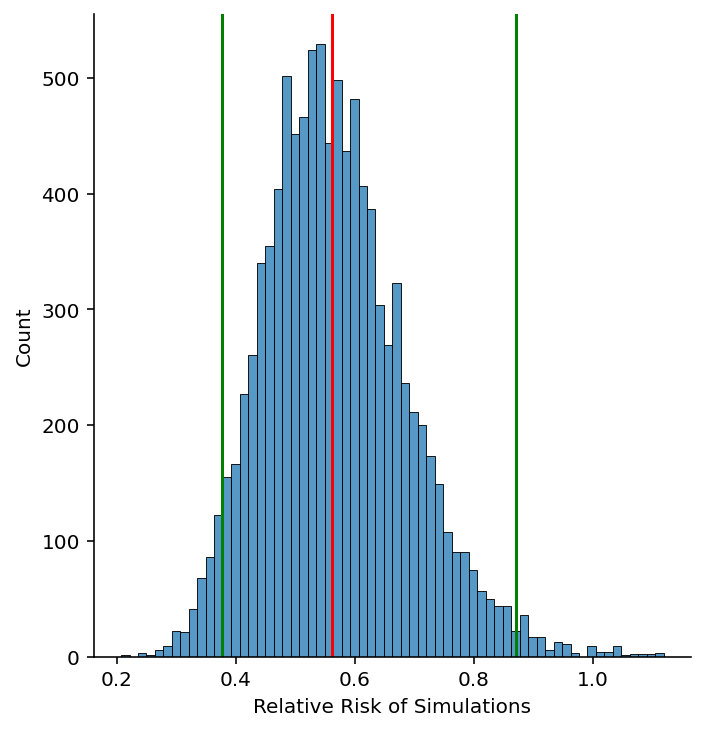

In [35]:
simresults.sort()
Mlower=simresults[249]
Mupper=simresults[9749]

lowerbound=np.exp(2*np.log(rrobs) - np.log(Mupper))
upperbound=np.exp(2*np.log(rrobs) - np.log(Mlower))

print ("95% CI = ",(lowerbound,upperbound))

p=sns.displot(data=simresults)
p.set(xlabel = "Relative Risk of Simulations")
plt.axvline(rrobs, color="red")
plt.axvline(lowerbound, color="green")
plt.axvline(upperbound, color="green")

23. Briefly interpret your computations.

In [26]:
#We made a 95% confidence interval of our simulated relative risks. This means that of our 10,000 confidence intervals, the true value will show up in 95% of them. If the drug did not make a difference in risk of infection, we would see a relative risk of 1.0. Since we do not see 1.0 in our 95% confidence interval, we can tentatively say that the drug indeed reduces the risk of infection. 